In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    categorical_vars = ['Work-accident', 'promotion-last-5years', 'sales', 'salary'],
    numerical_vars = ['satisfaction-level', 'last-evaluation', 'average-montly-hours',
                      'number-project', 'time-spend-company'],
    class_var = 'left'
)

In [15]:
exp = Experiment('data/HR_comma_sep.csv',
                 var_dict,
                 embedding_dim=8,
                 lr=0.2,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [16]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


11.131856679916382 training start
>>> Epoch = 1
Loss = 1.3055047988891602
[3, 2, 2, 3, 2] 0.644221734203
>>> Epoch = 2
Loss = 1.2012948989868164
[3, 2, 3, 2, 2] 0.642768725174
>>> Epoch = 3
Loss = 1.1077468395233154
[3, 3, 2, 2, 3] 0.573542811022
>>> Epoch = 4
Loss = 1.1982909440994263
[2, 2, 2, 2, 3] 0.53576805569
>>> Epoch = 5
Loss = 1.1002975702285767
[3, 2, 2, 2, 3] 0.56696508716
>>> Epoch = 6
Loss = 1.1147639751434326
[2, 2, 2, 2, 3] 0.497818858257
>>> Epoch = 7
Loss = 1.1227755546569824
[3, 2, 3, 2, 3] 0.525641271595
>>> Epoch = 8
Loss = 1.172673225402832
[3, 3, 2, 2, 3] 0.496955974922
>>> Epoch = 9
Loss = 1.0785534381866455
[3, 3, 2, 2, 3] 0.510419092193
>>> Epoch = 10
Loss = 1.095025658607483
[3, 2, 2, 2, 3] 0.502383433564
>>> Epoch = 11
Loss = 1.0975759029388428
[3, 3, 3, 2, 3] 0.51577452337
>>> Epoch = 12
Loss = 1.1060787439346313
[3, 2, 3, 2, 3] 0.502809146335
>>> Epoch = 13
Loss = 1.1100386381149292
[3, 3, 3, 2, 3] 0.517107542011
>>> Epoch = 14
Loss = 1.094846248626709
[3, 

>>> Epoch = 15
Loss = 1.3069517612457275
[3, 3, 2, 2, 3] 0.633751674127
>>> Epoch = 16
Loss = 1.362770676612854
[3, 3, 2, 2, 3] 0.627825405171
>>> Epoch = 17
Loss = 1.2838622331619263
[3, 4, 4, 2, 3] 0.646150360765
>>> Epoch = 18
Loss = 1.2856425046920776
[3, 4, 4, 2, 3] 0.639562677676
>>> Epoch = 19
Loss = 1.2806655168533325
[3, 4, 2, 2, 3] 0.631245766601
>>> Epoch = 20
Loss = 1.2590802907943726
[3, 3, 2, 2, 3] 0.629180139352
>>> Epoch = 21
Loss = 1.2609360218048096
[3, 3, 5, 2, 3] 0.63909400045
>>> Epoch = 22
Loss = 1.300602674484253
[3, 4, 2, 2, 3] 0.631259451828
>>> Epoch = 23
Loss = 1.3325591087341309
[3, 3, 4, 2, 3] 0.636045359278
>>> Epoch = 24
Loss = 1.3299320936203003
[3, 3, 5, 2, 3] 0.641923302806
>>> Epoch = 25
Loss = 1.3609470129013062
[3, 4, 5, 2, 3] 0.632936428043
>>> Epoch = 26
Loss = 1.375016689300537
[3, 3, 6, 2, 3] 0.627824574282
>>> Epoch = 27
Loss = 1.377579927444458
[3, 3, 2, 2, 3] 0.631657378176
>>> Epoch = 28
Loss = 1.3725416660308838
[3, 4, 2, 2, 3] 0.6254506328

>>> Epoch = 29
Loss = 1.4115307331085205
[3, 4, 6, 2, 3] 0.58946509862
>>> Epoch = 30
Loss = 1.4971165657043457
[3, 4, 7, 2, 3] 0.557432423054
>>> Epoch = 31
Loss = 1.4651782512664795
[3, 4, 3, 2, 3] 0.55359879733
>>> Epoch = 32
Loss = 1.4154105186462402
[3, 4, 7, 2, 3] 0.547605830445
>>> Epoch = 33
Loss = 1.4190484285354614
[3, 4, 2, 2, 3] 0.557979860901
>>> Epoch = 34
Loss = 1.4469903707504272
[3, 4, 8, 2, 3] 0.551606463674
>>> Epoch = 35
Loss = 1.4503583908081055
[3, 4, 8, 2, 3] 0.55674704376
>>> Epoch = 36
Loss = 1.4260382652282715
[3, 4, 7, 2, 3] 0.552207179083
>>> Epoch = 37
Loss = 1.4013698101043701
[3, 3, 7, 2, 3] 0.52947284266
>>> Epoch = 38
Loss = 1.3986936807632446
[3, 4, 2, 2, 3] 0.53575035701
>>> Epoch = 39
Loss = 1.447034478187561
[3, 4, 7, 2, 3] 0.552304950098
>>> Epoch = 40
Loss = 1.4220504760742188
[3, 4, 8, 2, 3] 0.546678692024
>>> Epoch = 41
Loss = 1.429443597793579
[3, 4, 8, 2, 3] 0.548669741678
>>> Epoch = 42
Loss = 1.40347421169281
[3, 4, 8, 2, 3] 0.540218643029
>

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 70
Loss = 1.3637111186981201
[3, 4, 8, 2, 3] 0.53148290976
>>> Epoch = 71
Loss = 1.4193192720413208
[3, 4, 8, 2, 3] 0.535023398957
>>> Epoch = 72
Loss = 1.440301537513733
[3, 4, 8, 2, 3] 0.530881234496
>>> Epoch = 73
Loss = 1.4137407541275024
[3, 4, 3, 2, 3] 0.527829877062
>>> Epoch = 74
Loss = 1.4193339347839355
[3, 4, 8, 2, 3] 0.531541753548
>>> Epoch = 75
Loss = 1.3865704536437988
[3, 4, 8, 2, 3] 0.531133698724
>>> Epoch = 76
Loss = 1.4571229219436646
[3, 4, 8, 2, 3] 0.53508977584
>>> Epoch = 77
Loss = 1.3973908424377441
[3, 4, 8, 2, 3] 0.530868919795
>>> Epoch = 78
Loss = 1.4406031370162964
[3, 4, 2, 2, 3] 0.522543825131
>>> Epoch = 79
Loss = 1.3787837028503418
[3, 4, 8, 2, 3] 0.532638320983
>>> Epoch = 80
Loss = 1.503922939300537
[3, 4, 8, 2, 3] 0.528770131642
>>> Epoch = 81
Loss = 1.429884672164917
[3, 4, 8, 2, 3] 0.532705835503
>>> Epoch = 82
Loss = 1.4220036268234253
[3, 4, 8, 2, 3] 0.529278239335
>>> Epoch = 83
Loss = 1.4384881258010864
[3, 4, 3, 2, 3] 0.5245398314

In [17]:
result = exp.print_scores(list_of_scores)

In [18]:
result.sort_values('nb_acc', ascending=False)

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5
8,ew_10,0.879,0.913,0.926,0.932,0.947,0.014790,0.938,0.940,0.942,0.942,0.943,50,0.918,0.984,0.986,0.985,0.980
9,ef_10,0.823,0.854,0.892,0.913,0.917,0.012613,0.901,0.903,0.903,0.903,0.903,38,0.884,0.976,0.978,0.978,0.971
6,ew_5,0.834,0.850,0.884,0.914,0.926,0.052257,0.894,0.898,0.898,0.899,0.900,25,0.858,0.960,0.961,0.962,0.958
3,sb_15,0.843,0.848,0.884,0.907,0.913,0.053567,0.894,0.898,0.897,0.897,0.897,20,0.852,0.944,0.945,0.946,0.942
5,ef_3,0.800,0.888,0.904,0.923,0.924,0.008256,0.861,0.862,0.862,0.861,0.861,15,0.851,0.954,0.955,0.955,0.953
4,ew_3,0.820,0.873,0.908,0.932,0.945,0.000665,0.853,0.858,0.859,0.860,0.860,15,0.843,0.955,0.955,0.955,0.952
7,ef_5,0.831,0.849,0.875,0.894,0.911,0.012613,0.861,0.863,0.863,0.862,0.862,23,0.840,0.961,0.961,0.962,0.957
2,sb_10,0.843,0.836,0.907,0.914,0.919,0.038484,0.851,0.850,0.850,0.850,0.851,12,0.830,0.929,0.929,0.931,0.929
1,sb_5,0.769,0.815,0.886,0.907,0.920,0.041209,0.801,0.804,0.804,0.804,0.806,14,0.787,0.924,0.926,0.926,0.923
0,raw,0.823,0.953,0.966,0.973,0.976,0.036859,0.766,0.768,0.769,0.769,0.769,5,0.762,0.989,0.990,0.990,0.986


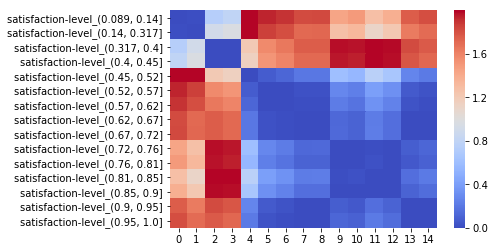

In [19]:
exp.semantic_binning.plot_pairwise_distance_between_bins('satisfaction-level')

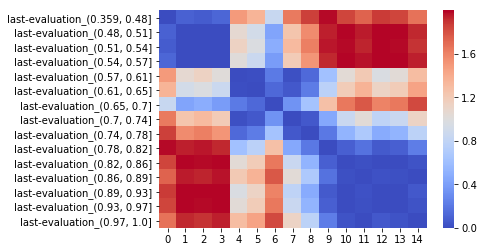

In [20]:
exp.semantic_binning.plot_pairwise_distance_between_bins('last-evaluation')

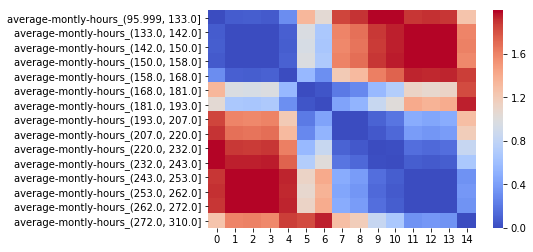

In [21]:
exp.semantic_binning.plot_pairwise_distance_between_bins('average-montly-hours')

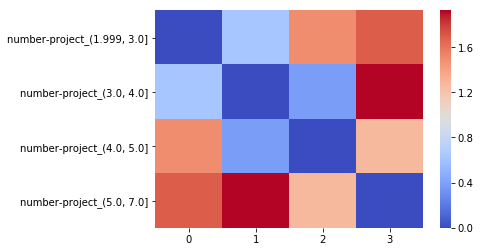

In [22]:
exp.semantic_binning.plot_pairwise_distance_between_bins('number-project')

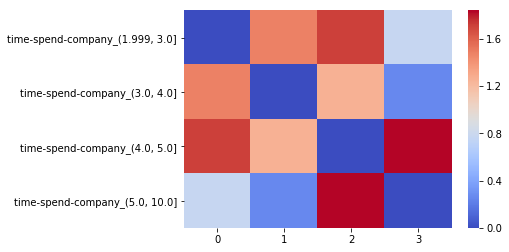

In [23]:
exp.semantic_binning.plot_pairwise_distance_between_bins('time-spend-company')

In [24]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

satisfaction-level
['(0.089, 0.317]', '(0.317, 0.45]', '(0.45, 1.0]']
last-evaluation
['(0.359, 0.57]', '(0.57, 0.7]', '(0.7, 0.78]', '(0.78, 1.0]']
average-montly-hours
['(95.999, 133.0]', '(133.0, 158.0]', '(158.0, 168.0]', '(168.0, 193.0]', '(193.0, 220.0]', '(220.0, 243.0]', '(243.0, 272.0]', '(272.0, 310.0]']
number-project
['(1.999, 5.0]', '(5.0, 7.0]']
time-spend-company
['(1.999, 3.0]', '(3.0, 5.0]', '(5.0, 10.0]']


In [31]:
from matplotlib import pyplot as plt

def plot_model_comparison_chart(result):
    
    def get_marker_colors(disc_method_list):
        colors = []
        for method in disc_method_list:
            if 'raw' in method:
                colors.append('y')
            if 'sb' in method:
                colors.append('r')
            if 'ew' in method:
                colors.append('b')
            if 'ef' in method:
                colors.append('g')
        return colors
        
    def get_rel_n_cols(result):
        n_cols = result['n_disc_cols']
        max_n_cols = n_cols.max()
        rel_n_cols = [(x / max_n_cols) for x in n_cols]
        return rel_n_cols
    
    def get_rel_acc(model_name, result):
        if model_name == 'DT':
            acc = result['dt_acc_depth=3']
        if model_name == 'LR':
            acc = result['lr_acc_C=1.0']
        if model_name == 'NB':
            acc = result['nb_acc']
        if model_name == 'RF':
            acc = result['rf_acc_n_est=20']
        if model_name == 'K-means':
            acc = result['kmeans_nmi']
        max_acc = acc.max()
        rel_acc = [(x / max_acc) for x in acc]
        return acc
    
    def make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig):        
        ax = fig.add_subplot(loc)
        ax.scatter(x=rel_n_cols, y=rel_acc, s=200, c=get_marker_colors(disc_method))
        for i, xy in enumerate(zip(rel_n_cols, rel_acc)):
            ax.annotate(disc_method[i], xy, fontsize=15)
        ax.set_title(model_name, fontsize=25)
        ax.set_xlabel('Relative Number of Columns', fontsize=25)
        if model_name == 'K-means':
            ax.set_ylabel('NMI', fontsize=20)        
        else:
            ax.set_ylabel('Accuracy', fontsize=20)        
        
    disc_method = result['disc_method']
    rel_n_cols = get_rel_n_cols(result)
    
    fig = plt.figure(figsize=(20,20))
    for model_name, loc in zip(['DT','LR','RF','K-means'], [221,222,223,224]):
        rel_acc = get_rel_acc(model_name, result)
        make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig)

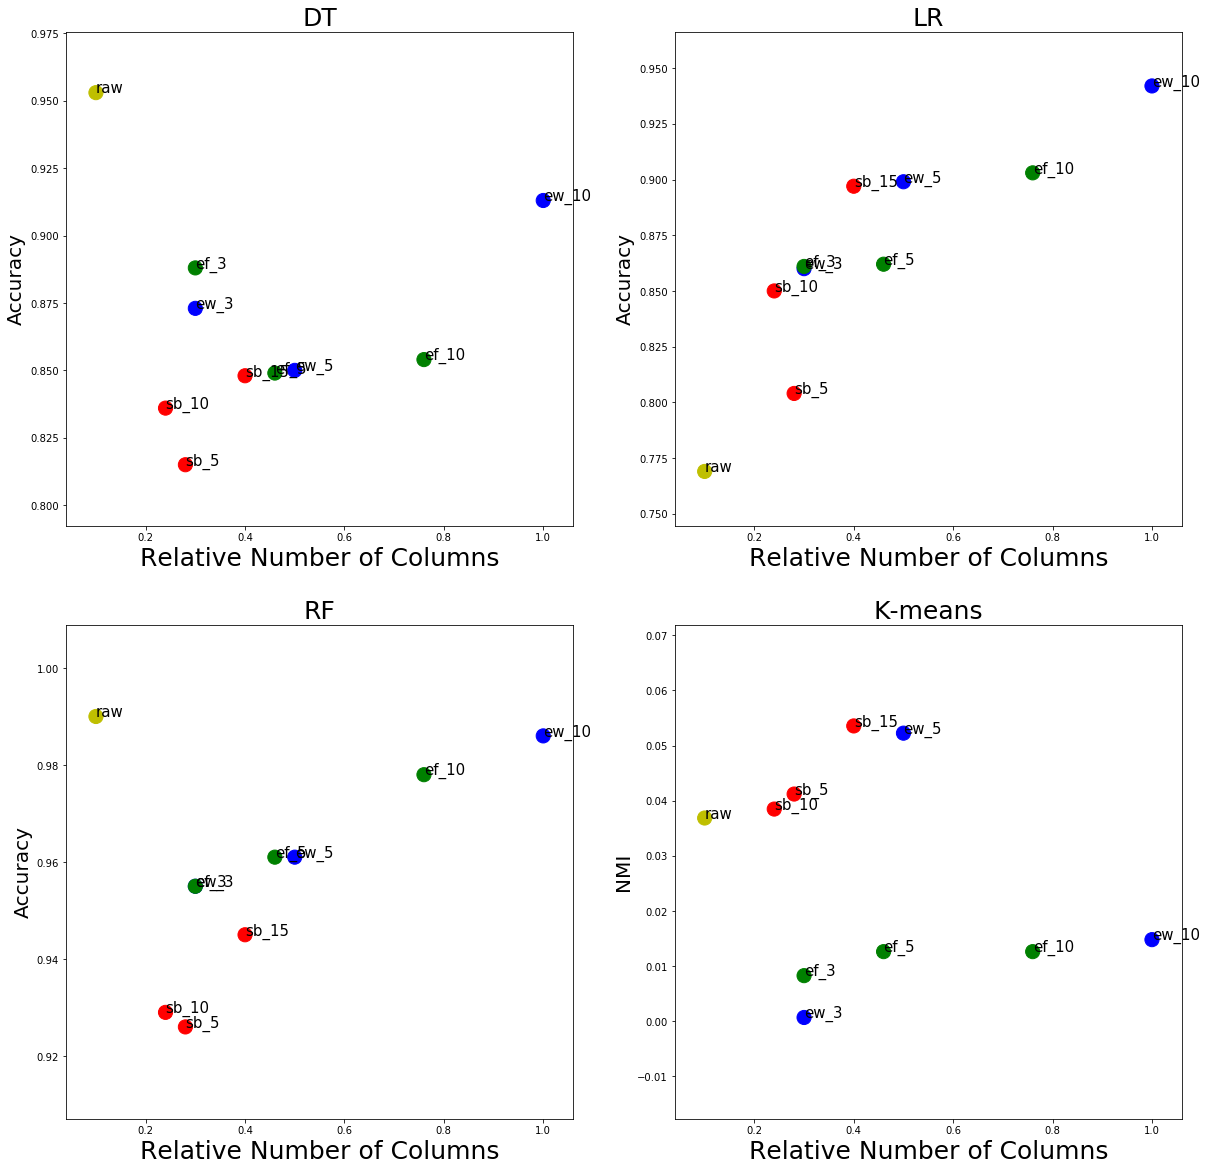

In [32]:
plot_model_comparison_chart(result)